<a href="https://colab.research.google.com/github/prasanna212003/weed-classification/blob/main/weeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("StudentProject_1.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
classes = ["CELOSIA ARGENTEA L" , "CROWFOOT GRASS", "PURPLE CHLORIS"]


In [ ]:
train_dir = "StudentProject_1/train/"
test_dir = "StudentProject_1/test/"

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['CELOSIA ARGENTEA L' 'CROWFOOT GRASS' 'PURPLE CHLORIS']


In [ ]:
import tensorflow.keras.preprocessing.image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 136 images belonging to 3 classes.
Found 57 images belonging to 3 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(3, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_1 = model_9.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
5/5 [==============================] - 12s 2s/step - loss: 1.1076 - accuracy: 0.3456 - val_loss: 1.0866 - val_accuracy: 0.3333
Epoch 2/5
5/5 [==============================] - 10s 2s/step - loss: 0.9972 - accuracy: 0.6471 - val_loss: 1.0503 - val_accuracy: 0.4912
Epoch 3/5
5/5 [==============================] - 10s 2s/step - loss: 0.8804 - accuracy: 0.7206 - val_loss: 1.0511 - val_accuracy: 0.4386
Epoch 4/5
5/5 [==============================] - 10s 2s/step - loss: 0.7352 - accuracy: 0.8162 - val_loss: 1.0338 - val_accuracy: 0.4737
Epoch 5/5
5/5 [==============================] - 8s 2s/step - loss: 0.5588 - accuracy: 0.8529 - val_loss: 1.1792 - val_accuracy: 0.4035


In [ ]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 136 images belonging to 3 classes.


In [ ]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_9)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
5/5 [==============================] - 13s 2s/step - loss: 1.5503 - accuracy: 0.2941 - val_loss: 1.4929 - val_accuracy: 0.2982
Epoch 2/5
5/5 [==============================] - 12s 2s/step - loss: 1.2437 - accuracy: 0.3015 - val_loss: 1.1623 - val_accuracy: 0.3333
Epoch 3/5
5/5 [==============================] - 11s 2s/step - loss: 1.1028 - accuracy: 0.3676 - val_loss: 1.1366 - val_accuracy: 0.3333
Epoch 4/5
5/5 [==============================] - 11s 2s/step - loss: 1.0953 - accuracy: 0.4412 - val_loss: 1.1075 - val_accuracy: 0.2982
Epoch 5/5
5/5 [==============================] - 11s 2s/step - loss: 1.0868 - accuracy: 0.4118 - val_loss: 1.1050 - val_accuracy: 0.3333


In [ ]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

# # New: EfficientNetB0 feature vector (version 2)
# efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers



In [ ]:
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

In [ ]:
def create_model(model_url, num_classes=3):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.
  
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape
  
  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer      
  ])

  return model

In [ ]:
# Create model
resnet_model = create_model(resnet_url, num_classes=train_data.num_classes)

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
# Fit the model
resnet_history = resnet_model.fit(train_data,
                                  epochs=5,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data)
)
                                    

Epoch 1/5
5/5 [==============================] - 41s 8s/step - loss: 1.2784 - accuracy: 0.3750 - val_loss: 1.0787 - val_accuracy: 0.4912
Epoch 2/5
5/5 [==============================] - 30s 7s/step - loss: 0.6583 - accuracy: 0.7353 - val_loss: 0.7118 - val_accuracy: 0.7018
Epoch 3/5
5/5 [==============================] - 30s 6s/step - loss: 0.4000 - accuracy: 0.8824 - val_loss: 0.5295 - val_accuracy: 0.7544
Epoch 4/5
5/5 [==============================] - 29s 7s/step - loss: 0.2514 - accuracy: 0.9485 - val_loss: 0.4314 - val_accuracy: 0.7719
Epoch 5/5
5/5 [==============================] - 30s 6s/step - loss: 0.1961 - accuracy: 0.9559 - val_loss: 0.3656 - val_accuracy: 0.7895


In [ ]:
# Create model
efficientnet_model = create_model(model_url=efficientnet_url, # use EfficientNetB0 TensorFlow Hub URL
                                  num_classes=train_data.num_classes)

# Compile EfficientNet model
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit EfficientNet model 
efficientnet_history = efficientnet_model.fit(train_data, # only use 10% of training data
                                              epochs=5, # train for 5 epochs
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data)
)

Epoch 1/5
5/5 [==============================] - 26s 3s/step - loss: 0.9994 - accuracy: 0.5074 - val_loss: 0.7679 - val_accuracy: 0.7193
Epoch 2/5
5/5 [==============================] - 13s 3s/step - loss: 0.6764 - accuracy: 0.8015 - val_loss: 0.5441 - val_accuracy: 0.9298
Epoch 3/5
5/5 [==============================] - 13s 3s/step - loss: 0.5000 - accuracy: 0.8824 - val_loss: 0.4070 - val_accuracy: 0.9649
Epoch 4/5
5/5 [==============================] - 13s 3s/step - loss: 0.3699 - accuracy: 0.9338 - val_loss: 0.3179 - val_accuracy: 0.9649
Epoch 5/5
5/5 [==============================] - 13s 3s/step - loss: 0.3001 - accuracy: 0.9559 - val_loss: 0.2615 - val_accuracy: 1.0000


In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).
  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
!wget https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.spokesman.com%2Fstories%2F2020%2Foct%2F16%2Fa-rainbow-of-cannabis-what-different-colors-tell-u%2F&psig=AOvVaw3kI-Tcy6GMFbqySUMutrk6&ust=1681718281191000&source=images&cd=vfe&ved=0CBEQjRxqFwoTCJDG-_v2rf4CFQAAAAAdAAAAABAJ

--2023-04-16 07:58:41--  https://www.google.com/url?sa=i
Resolving www.google.com (www.google.com)... 142.251.163.103, 142.251.163.105, 142.251.163.106, ...
Connecting to www.google.com (www.google.com)|142.251.163.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘url?sa=i’

url?sa=i                [ <=>                ]   1.36K  --.-KB/s    in 0s      

2023-04-16 07:58:41 (17.9 MB/s) - ‘url?sa=i’ saved [1389]



1/1 [==============================] - 1s 1s/step


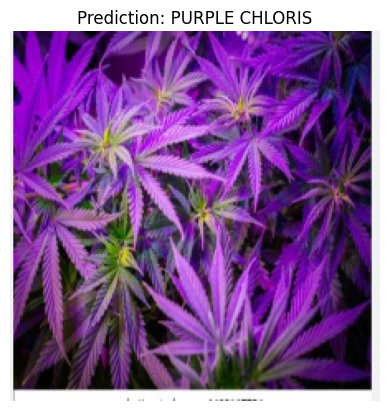

In [ ]:
# Make a prediction using model_11
pred_and_plot(model=efficientnet_model, 
              filename="rain.jpg", 
              class_names=class_names)

Prediction is correct

In [ ]:
# Save a model
model_11.save("saved_trained_model")

In [ ]:
efficientnet_model.evaluate(test_data)

2/2 [==============================] - 3s 1s/step - loss: 0.2615 - accuracy: 1.0000


[0.2614676356315613, 1.0]